In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

class Generator(nn.Module):
    '''
    Generator class. Accepts a tensor of size 100 as input as outputs another
    tensor of size 784. Objective is to generate an output tensor that is
    indistinguishable from the real MNIST digits 
    '''

    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(nn.Linear(in_features=128, out_features=256),
                                    nn.LeakyReLU())
        self.layer2 = nn.Sequential(nn.Linear(in_features=256, out_features=512),
                                    nn.LeakyReLU())
        self.layer3 = nn.Sequential(nn.Linear(in_features=512, out_features=1024),
                                    nn.LeakyReLU())
        self.output = nn.Linear(in_features=1024, out_features=28 * 28)

        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.output(x)
        x = x.view(-1, 1, 28, 28)
        x = self.tanh(x)
        return x


model = torch.load(r'./test/Generator_epoch_29.pth', map_location='cpu')

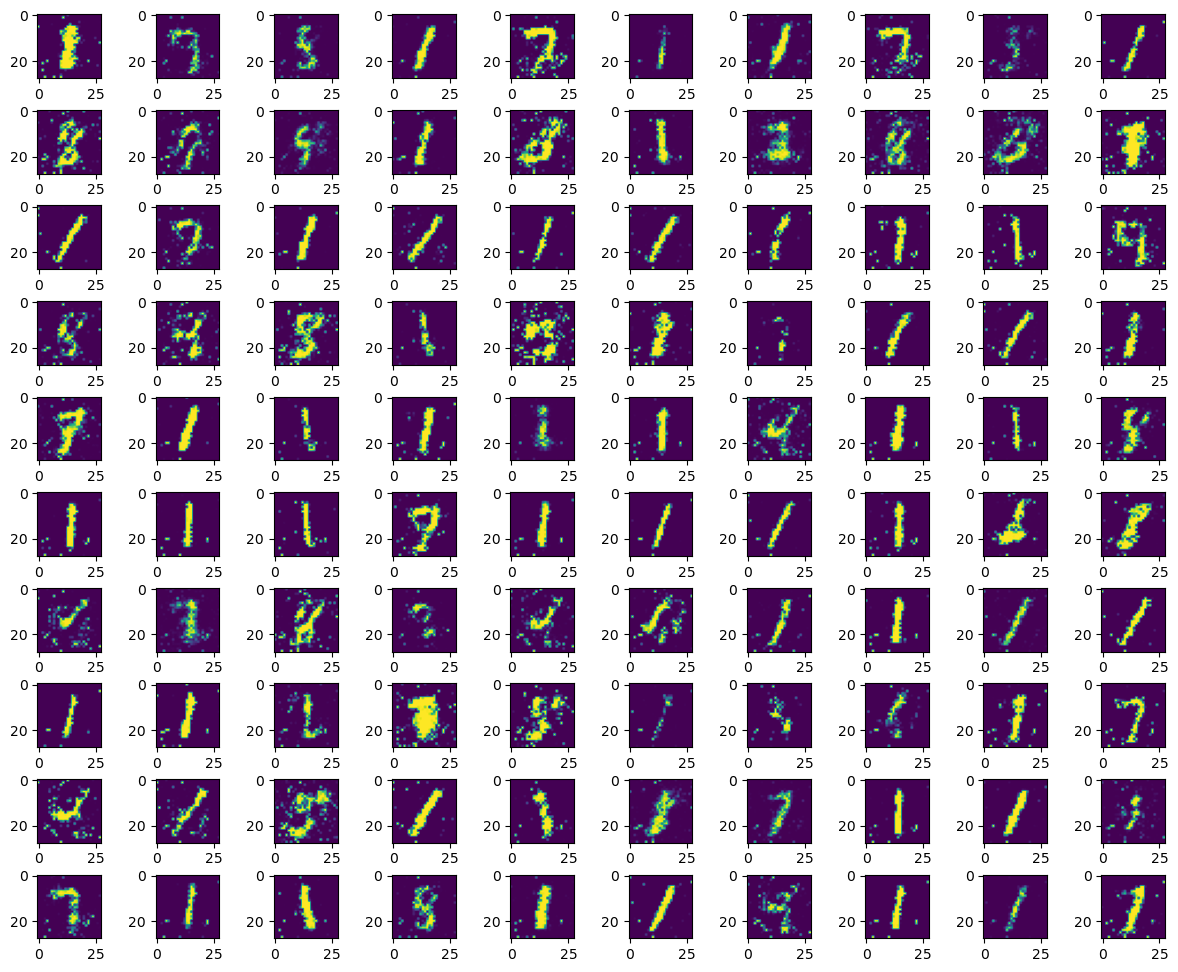

In [2]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
for n in range(100):
    ax = plt.subplot(10, 10, n + 1)

    # filter df and plot ticker on the new subplot axis
    ax.imshow(model(torch.randn(128)).detach().numpy().squeeze())

    ax.set_xlabel("")
    

In [3]:
model(torch.randn(128)).detach().numpy().squeeze()

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -0.99999994, -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -0.9999877 , -1.        , -1.        , -1.        , -1.        ,
        -0.999995  , -1.        , -1.        , -1.        , -0.99986476,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -0.99401855, -1.        , -1.        , -1.        ,
        -0.99999994,  0.02392138, -0.9999944 , -1.        , -1.        ,
        -0.9993394 , -1.        , -1.        , -1.        , -0.99998534,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.    

In [15]:
model(torch.randn(128)).squeeze().size()

torch.Size([28, 28])

In [44]:
ax

<Axes: >

In [7]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
class Improver(torch.nn.Module):
    def __init__(self):
        super(Improver, self).__init__()
        self.layer1 = torch.nn.Sequential(torch.nn.Conv2d(in_channels=3,
                                                          out_channels=9,
                                                          kernel_size=3,
                                                          stride=1,
                                                          padding=1),
                                          torch.nn.LeakyReLU(),
                                          torch.nn.Conv2d(in_channels=9,
                                                          out_channels=9,
                                                          kernel_size=3,
                                                          stride=1,
                                                          padding=1),
                                          #nn.BatchNorm2d(9),
                                          nn.MaxPool2d(kernel_size=5, stride=2, padding=2))
        self.layer2 = torch.nn.Sequential(torch.nn.Conv2d(in_channels=9,
                                                          out_channels=36,
                                                          kernel_size=5,
                                                          stride=1),
                                          torch.nn.LeakyReLU(),
                                          #nn.BatchNorm2d(36),
                                          nn.MaxPool2d(kernel_size=4, stride=2, padding=1))
        self.layer3 = torch.nn.Sequential(torch.nn.Conv2d(36,
                                                          128,
                                                          kernel_size=(3, 3),
                                                          stride=1,
                                                          padding=1),
                                          torch.nn.LeakyReLU(),
                                          #nn.BatchNorm2d(128),
                                          nn.MaxPool2d(3, 2, 1))

        self.layer4 = torch.nn.Sequential(torch.nn.Conv2d(128,
                                                          128,
                                                          kernel_size=7,
                                                          stride=1,
                                                          padding=1),
                                          torch.nn.LeakyReLU(),
                                          #nn.BatchNorm2d(128),
                                          nn.MaxPool2d(3, 2, 1))

        self.fc1 = torch.nn.Linear(256, 512)
        self.ac5 = torch.nn.LeakyReLU()
        self.fc2 = torch.nn.Linear(512, 1024)
        self.ac6 = torch.nn.LeakyReLU()
        self.fc3 = torch.nn.Linear(1024, 3 * 64 * 64)
        self.ac_end = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = x.view(-1, 256 * 1 * 1)
        x = self.fc1(x)
        x = self.ac5(x)
        x = self.fc2(x)
        x = self.ac6(x)
        x = self.fc3(x)
        x = x.view(-1, 3, 64, 64)
        x = self.ac_end(x)
        return x

model = torch.load(r'D:\Github proj\MachineLearning\ML\PROducts\Paint_to_theworkofart\epochs\Generator_epoch_29.pth', map_location='cpu')

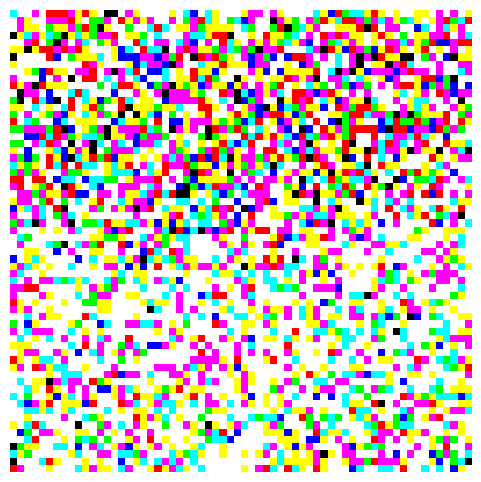

In [23]:
transform = transforms.Compose([transforms.Resize(64),
                                transforms.CenterCrop(64),
                                #transforms.Grayscale(num_output_channels=1),
                                transforms.ToTensor()])
X = datasets.ImageFolder('D:\Github proj\MachineLearning\ML\PROducts\Paint_to_theworkofart\datasets\X', transform=transform)
X_dataloader = torch.utils.data.DataLoader(X,
                                           batch_size=16,
                                           shuffle=False)
plt.figure(figsize=(6, 6))
images = next(iter(X_dataloader))
plt.tick_params(axis='both', length=0)
plt.axis("off")
plt.imshow(model(images[0][1])[0].detach().numpy().transpose((1, 2, 0)))

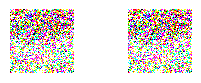

In [28]:
images = next(iter(X_dataloader))
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
n = 0
for img in images:
    ax = plt.subplot(10, 10, n + 1)

    # filter df and plot ticker on the new subplot axis
    ax.imshow(model(images[0][n])[0].detach().numpy().transpose((1, 2, 0)))
    plt.tick_params(axis='both', length=0)
    plt.axis("off")
    ax.set_xlabel("")
    n+=1

In [30]:
images.size()

AttributeError: 'list' object has no attribute 'size'

In [50]:
model(images[0][n]).size()

torch.Size([2, 3, 64, 64])

In [43]:
images[0][0].size()

torch.Size([3, 64, 64])